Import three dependent libraries: pandas (`pd`) for data manipulation, numpy (`np`) for computation, statsmodels formulas (`smf`) for building models using formulas, and matplotlib's pyplot (`plt`) for visualization.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

First, make sure that the data file `data-auto-club.csv` is accessible to your Python environment. If you are using your local machine, you can put it in the same directory as this Jupyter notebook. If you are using a cloud service like Google Colab, make sure to upload the file to the remote machine (expand folder icon on left side and click upload button).

Next, read the data file using pandas.

In [2]:
df = pd.read_csv('data-auto-club.csv')
display(df)

,Request,Age
0,1,52
1,1,57
2,1,53
3,1,57
4,1,48
...,...,...
87,0,42
88,0,39
89,0,32
90,0,29


First, create a plot of the independent variable (age) versus dependent variable (request info).

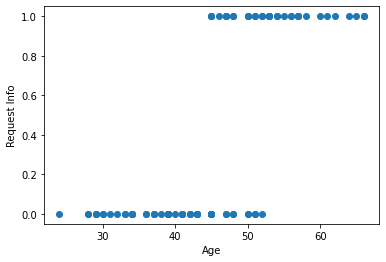

In [3]:
plt.figure()
plt.scatter(df.Age, df.Request)
plt.xlabel('Age')
plt.ylabel('Request Info')
plt.show()

Next, build and fit an logit model using statsmodels. The desired equation models the boolean `Request` variable as a function of the `Age` variable.

In [4]:
model = smf.logit('Request ~ Age', data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.271395
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Request   No. Observations:                   92
Model:                          Logit   Df Residuals:                       90
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.5945
Time:                        00:46:47   Log-Likelihood:                -24.968
converged:                       True   LL-Null:                       -61.578
Covariance Type:            nonrobust   LLR p-value:                 1.160e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.4078      4.523     -4.512      0.000     -29.273     -11.542
Age            0.4259      0.

We can use the fitted model to plot the resulting relationship between age and requesting information. 

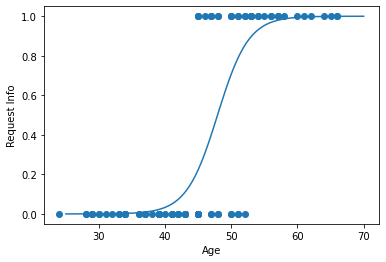

In [5]:
x = pd.DataFrame(np.linspace(25,70,100), columns=['Age'])

plt.figure()
plt.scatter(df.Age, df.Request)
plt.plot(x, model.predict(x))
plt.xlabel('Age')
plt.ylabel('Request Info')
plt.show()